Connected to myenv38 (Python 3.8.19)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from test_functions1D import (DiscontinuousFunc_numpy,
                              MultiMinimaAbsFunc_numpy, MultiMinimaFunc_numpy,
                              Sin_numpy, Sinc_numpy)
from scipy.optimize import differential_evolution

# Define the h function
def h(z, h_parameters):
    f, T, x = h_parameters  # Unpack the parameters (f = selected_function, T = fixed_T)
    return f(z) + (1 / (2 * T)) * (z - x)**2

# Define the objective function
def objective(delta, f, x, t, prox_ft, n_samples=100000):
    # Sample from N(x, delta*t)
    y_samples = np.random.normal(x, delta * t, n_samples)
    
    # Compute the two expectations
    exponent = -f(y_samples) / delta
    shifted_exponent = exponent - np.max(exponent)  # Numerical stability
    exp_values = np.exp(shifted_exponent)
    exp_values_y = y_samples * exp_values
    
    # Compute the ratio
    E1 = np.mean(exp_values_y)
    E2 = np.mean(exp_values)
    ratio = E1 / E2
    
    # Minimize the absolute difference from prox_ft(x)
    return np.abs(ratio - prox_ft)

# Parameters
x = 1.0  # Point of interest
t = 1  # Time step
n_samples=100000

# Optimize to find prox_ft
hk_parameters = (MultiMinimaFunc_numpy, t, x)
result = differential_evolution(h, [(-30, 30)], args=(hk_parameters,))
prox_ft = result.x[0]

# Grid search for delta
delta_values = np.linspace(0.01, 5.0, 100)  # Search range for delta
errors = [objective(delta, MultiMinimaFunc_numpy, x, t, prox_ft,n_samples) for delta in delta_values]
best_delta = delta_values[np.argmin(errors)]

print("Optimal delta:", best_delta)

# Plot the objective function
plt.figure(figsize=(10, 6))
plt.plot(delta_values, errors, label="Objective Function")
plt.axvline(best_delta, color='r', linestyle='--', label=f"Optimal δ = {best_delta:.2f}")
plt.xlabel("δ (delta)")
plt.ylabel("Objective Function Value")
plt.title("Objective Function vs. δ (Delta)")
plt.legend()
plt.grid()
plt.show()


Optimal delta: 0.9326773547094188
Max error: 22.493698900956858


/tmp/ipykernel_2390/2393286252.py:60: RuntimeWarning: divide by zero encountered in divide
  plt.semilogy(delta_values,(np.exp(1-1 / np.sqrt((np.abs(delta_values - shift))))), label=r"exp(1-1/|δ-shift|)")


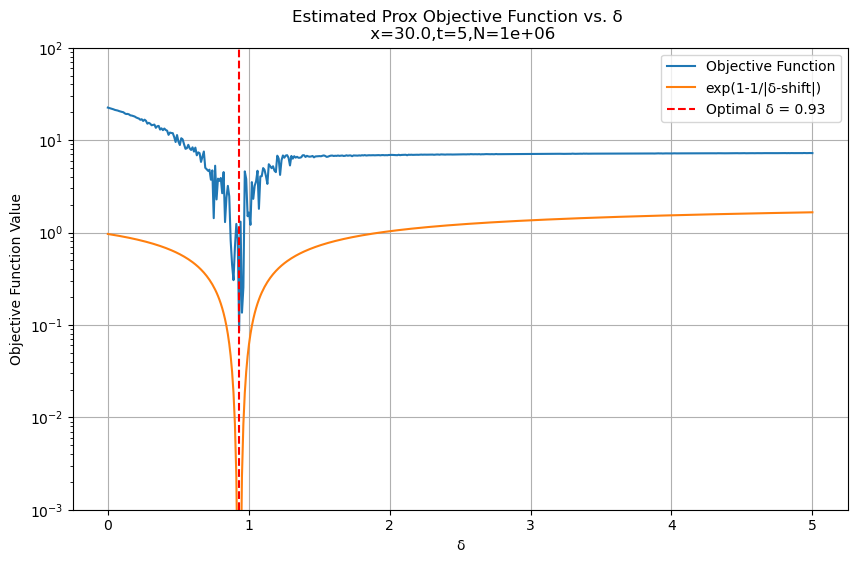

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from test_functions1D import (DiscontinuousFunc_numpy,
                              MultiMinimaAbsFunc_numpy, MultiMinimaFunc_numpy,
                              Sin_numpy, Sinc_numpy)
from scipy.optimize import differential_evolution

def quadratic(x):
    return (1/2)*x ** 2

# Define the h function
def h(z, h_parameters):
    f, T, x = h_parameters  # Unpack the parameters (f = selected_function, T = fixed_T)
    return f(z) + (1 / (2 * T)) * (z - x)**2

# Define the objective function
def objective(delta, f, x, t, prox_ft, n_samples=1000000):
    # Sample from N(x, delta*t)
    y_samples = np.random.normal(x, delta * t, n_samples)
    
    # Compute the two expectations
    exponent = -f(y_samples) / delta
    shifted_exponent = exponent - np.max(exponent)  # Numerical stability
    exp_values = np.exp(shifted_exponent)
    exp_values_y = y_samples * exp_values
    
    # Compute the ratio
    E1 = np.mean(exp_values_y)
    E2 = np.mean(exp_values)
    ratio = E1 / E2
    
    # Minimize the absolute difference from prox_ft(x)
    return np.linalg.norm(ratio - prox_ft)

# Parameters
#x_global_min = -11.51034568
x = 30.0 # Point of interest
t = 5  # Time step
n_samples=1000000

# Optimize to find prox_ft
hk_parameters = (MultiMinimaFunc_numpy, t, x)
result = differential_evolution(h, [(-30, 30)], args=(hk_parameters,))
prox_ft = result.x[0]
# prox_ft = x/(1+t)

# Grid search for delta
delta_values = np.linspace(0.001, 5.0, 500)  # Search range for delta
errors = [objective(delta, quadratic, x, t, prox_ft,n_samples) for delta in delta_values]
best_delta = delta_values[np.argmin(errors)]

print("Optimal delta:", best_delta)
print("Max error:", np.max(errors))
# Plot the objective function
plt.figure(figsize=(10, 6))
plt.semilogy(delta_values, errors, label="Objective Function")
shift = best_delta
#plt.semilogy(delta_values,(t*np.exp((delta_values))), label=r"exp(1-1/√|δ-shift|)")

plt.semilogy(delta_values,(np.exp(1-1 / np.sqrt((np.abs(delta_values - shift))))), label=r"exp(1-1/|δ-shift|)")
plt.axvline(best_delta, color='r', linestyle='--', label=f"Optimal δ = {best_delta:.2f}")
plt.ylim(10**(-3), 10**2)
plt.xlabel("δ")
plt.ylabel("Objective Function Value")
plt.title(f"Estimated Prox Objective Function vs. δ \n x={x},t={t},N={n_samples:.0e}")
plt.legend()
plt.grid()
plt.show()


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
from test_functions1D import MultiMinimaFunc_numpy
from scipy.optimize import differential_evolution

# Define the h function
def h(z, h_parameters):
    f, T, x = h_parameters  # Unpack the parameters (f = selected_function, T = fixed_T)
    return f(z) + (1 / (2 * T)) * (z - x)**2

# Define the objective function
def objective(delta, f, x, t, prox_ft, n_samples=100000):
    # Sample from N(x, delta*t)
    y_samples = np.random.normal(x, delta * t, n_samples)

    # Compute the two expectations
    exponent = -f(y_samples) / delta
    shifted_exponent = exponent - np.max(exponent)  # Numerical stability
    exp_values = np.exp(shifted_exponent)
    exp_values_y = y_samples * exp_values

    # Compute the ratio
    E1 = np.mean(exp_values_y)
    E2 = np.mean(exp_values)
    ratio = E1 / E2

    # Minimize the absolute difference from prox_ft(x)
    return np.abs(ratio - prox_ft)

# Function to compute prox_ft for given x and t
def compute_prox_ft(x, t):
    hk_parameters = (MultiMinimaFunc_numpy, t, x)
    result = differential_evolution(h, [(-30, 30)], args=(hk_parameters,))
    return result.x[0]

# Create animation
def create_animation(x_range, t_fixed, filename, delta_range=(0.001, 5.0), n_samples=100000):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(delta_range[0], delta_range[1])
    ax.set_ylim(1e-8, 1e2)
    ax.set_yscale('log')
    ax.set_xlabel("\u03B4")
    ax.set_ylabel("Objective Function Value")
    ax.set_title("Estimated Prox Objective Function")

    line, = ax.plot([], [], label="Objective Function")
    ax.legend()

    def update(frame):
        x = x_range[frame] if isinstance(x_range, np.ndarray) else x_range
        t = t_fixed if isinstance(t_fixed, (int, float)) else t_fixed[frame]

        prox_ft = compute_prox_ft(x, t)
        delta_values = np.linspace(*delta_range, 500)
        errors = [objective(delta, MultiMinimaFunc_numpy, x, t, prox_ft, n_samples) for delta in delta_values]
        
        line.set_data(delta_values, errors)
        if x == -1.51034568-10:
            ax.set_title(f"Estimated Prox Objective Function\n Global Min for f(x): x=-11.51, t={t:.2f}")
        else:
            ax.set_title(f"Estimated Prox Objective Function\n x={x:.2f}, t={t:.2f}")
        return line,

    anim = FuncAnimation(fig, update, frames=len(x_range if isinstance(x_range, np.ndarray) else t_fixed), interval=200, blit=True)
    anim.save(filename, writer=PillowWriter(fps=5))
    plt.close(fig)

# Animation 1: t = 0.01, x from -50 to -10 to 50
x_range1 = np.linspace(-100, 100, 100)
create_animation(x_range1, t_fixed=1000, filename="animation_smallert0.01.gif")

# Animation 2: t = 1000, x from -50 to -10 to 50
x_range1 = np.linspace(-100, 100, 100)
create_animation(x_range1, t_fixed=1000, filename="animation_smallert1000.gif")

# Animation 3: t = 10, x from -50 to -10 to 50
x_range2 = np.linspace(-100, 100, 100)
create_animation(x_range2, t_fixed=5, filename="animation_smallt5.gif")

#Animation 4: x = -10, t from 0.5 to 1000
t_range3 = np.logspace(np.log10(0.01), np.log10(100), 100)
create_animation(x_range=-1.51034568-10, t_fixed=t_range3, filename="animation_x_global_min.gif")

# Animation 5: x = -50, t from 0.5 to 1000
t_range4 = np.logspace(np.log10(0.5), np.log10(1000), 100)
create_animation(x_range=50, t_fixed=t_range4, filename="animation_x_50.gif")

print("Animations saved: animation_t1000.gif, animation_t10.gif, animation_x_neg10.gif")


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from test_functions1D import MultiMinimaFunc_numpy
from scipy.optimize import differential_evolution

# Define the h function
def h(z, h_parameters):
    f, T, x = h_parameters  # Unpack the parameters (f = selected_function, T = fixed_T)
    return f(z) + (1 / (2 * T)) * (z - x)**2

# Define the objective function
def objective(delta, f, x, t, prox_ft, n_samples=100000):
    # Sample from N(x, delta*t)
    y_samples = np.random.normal(x, delta * t, n_samples)

    # Compute the two expectations
    exponent = -f(y_samples) / delta
    shifted_exponent = exponent - np.max(exponent)  # Numerical stability
    exp_values = np.exp(shifted_exponent)
    exp_values_y = y_samples * exp_values

    # Compute the ratio
    E1 = np.mean(exp_values_y)
    E2 = np.mean(exp_values)
    ratio = E1 / E2

    # Minimize the absolute difference from prox_ft(x)
    return np.abs(ratio - prox_ft)

# Function to compute prox_ft for given x and t
def compute_prox_ft(x, t):
    hk_parameters = (MultiMinimaFunc_numpy, t, x)
    result = differential_evolution(h, [(-30, 30)], args=(hk_parameters,))
    return result.x[0]

# Create frames
def create_frames(x_range, t_fixed, filename_prefix, delta_range=(0.001, 5.0), n_samples=100000):
    fig, ax = plt.subplots(figsize=(8, 6))
    ax.set_xlim(delta_range[0], delta_range[1])
    ax.set_ylim(1e-8, 1e2)
    ax.set_yscale('log')
    ax.set_xlabel("\u03B4")
    ax.set_ylabel("Objective Function Value")
    ax.set_title("Estimated Prox Objective Function")

    line, = ax.plot([], [], label="Objective Function")
    ax.legend()

    def update(frame):
        x = x_range[frame] if isinstance(x_range, np.ndarray) else x_range
        t = t_fixed if isinstance(t_fixed, (int, float)) else t_fixed[frame]

        prox_ft = compute_prox_ft(x, t)
        delta_values = np.linspace(*delta_range, 500)
        errors = [objective(delta, MultiMinimaFunc_numpy, x, t, prox_ft, n_samples) for delta in delta_values]
        
        line.set_data(delta_values, errors)
        if x == -1.51034568-10:
            ax.set_title(f"Estimated Prox Objective Function\n Global Min for f(x): x=-11.51, t={t:.2f}")
        else:
            ax.set_title(f"Estimated Prox Objective Function\n x={x:.2f}, t={t:.2f}")

        # Save the current frame as a PNG image
        frame_filename = f"{filename_prefix}_frame_{frame:03d}.png"
        fig.savefig(frame_filename)
        return line,

    # Generate frames
    for frame in range(len(x_range if isinstance(x_range, np.ndarray) else t_fixed)):
        update(frame)

    plt.close(fig)

# Animation 1: t = 0.01, x from -50 to -10 to 50
x_range1 = np.linspace(-100, 100, 100)
create_frames(x_range1, t_fixed=1000, filename_prefix="frames_smallert0.01")

# Animation 2: t = 1000, x from -50 to -10 to 50
x_range1 = np.linspace(-100, 100, 100)
create_frames(x_range1, t_fixed=1000, filename_prefix="frames_smallert1000")

# Animation 3: t = 10, x from -50 to -10 to 50
x_range2 = np.linspace(-100, 100, 100)
create_frames(x_range2, t_fixed=5, filename_prefix="frames_smallt5")

# Animation 4: x = -10, t from 0.5 to 1000
t_range3 = np.logspace(np.log10(0.01), np.log10(100), 100)
create_frames(x_range=-1.51034568-10, t_fixed=t_range3, filename_prefix="frames_x_global_min")

# Animation 5: x = -50, t from 0.5 to 1000
t_range4 = np.logspace(np.log10(0.5), np.log10(1000), 100)
create_frames(x_range=50, t_fixed=t_range4, filename_prefix="frames_x_50")

print("Frames saved with filenames like frames_smallert0.01_frame_001.png")
